In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
!unzip "/content/drive/My Drive/train_LbELtWX (1).zip"

Streaming output truncated to the last 5000 lines.
 extracting: train/45712.png         
 extracting: train/57389.png         
 extracting: train/5260.png          
 extracting: train/58492.png         
 extracting: train/58143.png         
 extracting: train/616.png           
 extracting: train/25467.png         
 extracting: train/37219.png         
 extracting: train/55151.png         
 extracting: train/57860.png         
 extracting: train/22627.png         
 extracting: train/52644.png         
 extracting: train/45879.png         
 extracting: train/33451.png         
 extracting: train/23972.png         
 extracting: train/38967.png         
 extracting: train/38753.png         
 extracting: train/33900.png         
 extracting: train/50011.png         
 extracting: train/1922.png          
 extracting: train/5638.png          
 extracting: train/37358.png         
 extracting: train/6609.png          
 extracting: train/6492.png          
 extracting: train/36174.png         

In [40]:
train = pd.read_csv("train.csv")

In [41]:
train.shape

(60000, 2)

In [42]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [43]:
img = load_img('train/36753.png')
img


In [44]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/60000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 60000/60000 [00:21<00:00, 2830.70it/s]


In [45]:
y = train["label"].values

In [46]:
X.shape

(60000, 28, 28, 1)

In [48]:
y = to_categorical(y)

In [50]:
y.shape

(60000, 10)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 28, 28, 1)
(18000, 28, 28, 1)
(42000, 10)
(18000, 10)


In [53]:
#Creating model
model = Sequential()

In [55]:
input_shape = (X.shape[1],X.shape[2],X.shape[3])

In [56]:
input_shape

(28, 28, 1)

In [57]:
model.add(Conv2D(input_shape = (X.shape[1],X.shape[2],
                                X.shape[3]),filters =  10,
                                kernel_size = (3,3),strides=(1,1),padding="valid"))

In [58]:
model.output_shape

(None, 26, 26, 10)

In [60]:
import tensorflow as tf

In [63]:
#Activation Layer
model.add(Activation("relu"))

In [64]:
#Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [65]:
model.add(Flatten())

In [66]:
model.output_shape

(None, 1690)

In [68]:
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [90]:
from keras import optimizers

In [91]:
adam = optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])

In [94]:
history = model.fit(X_train,y_train,batch_size=50,epochs=50,validation_split=0.3,verbose=1)

Epoch 1/50
588/588 [==============================] - 11s 19ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0052 - val_accuracy: 0.9985
Epoch 2/50
588/588 [==============================] - 11s 18ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0323 - val_accuracy: 0.9913
Epoch 3/50
588/588 [==============================] - 11s 18ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0046 - val_accuracy: 0.9989
Epoch 4/50
588/588 [==============================] - 11s 18ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.0236 - val_accuracy: 0.9925
Epoch 5/50
588/588 [==============================] - 11s 19ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0200 - val_accuracy: 0.9930
Epoch 6/50
588/588 [==============================] - 11s 18ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0166 - val_accuracy: 0.9944
Epoch 7/50
588/588 [==============================] - 11s 18ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0246 - val_accuracy:

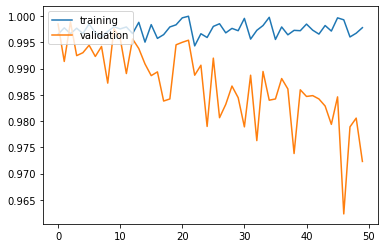

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [97]:
results = model.evaluate(X_test,y_test)

563/563 [==============================] - 3s 6ms/step - loss: 1.1800 - accuracy: 0.8962


In [109]:
results[1]

0.8962222337722778

In [110]:
model1 = Sequential()

In [111]:
model1.add(Conv2D(input_shape = (X.shape[1],X.shape[2],
                                X.shape[3]),filters =  10,
                                kernel_size = (3,3),strides=(1,1),padding="valid"))

In [112]:
#Activation Layer
model1.add(Activation("elu"))

In [114]:
#Pooling Layer
model1.add(MaxPooling2D(pool_size=(2,2)))

In [115]:
model1.add(Flatten())

In [116]:
model1.add(Dense(50))
model1.add(Activation('elu'))
model1.add(Dense(50))
model1.add(Activation('elu'))
model1.add(Dense(50))
model1.add(Activation('elu'))
model1.add(Dense(50))
model1.add(Activation('elu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

In [117]:
adam = optimizers.Adam(lr=0.001)
model1.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])

In [118]:
history = model1.fit(X_train,y_train,batch_size=50,epochs=50,validation_split=0.3,verbose=1)


Epoch 1/50
588/588 [==============================] - 13s 23ms/step - loss: 0.5503 - accuracy: 0.7964 - val_loss: 0.4255 - val_accuracy: 0.8509
Epoch 2/50
588/588 [==============================] - 13s 23ms/step - loss: 0.3731 - accuracy: 0.8653 - val_loss: 0.3712 - val_accuracy: 0.8673
Epoch 3/50
588/588 [==============================] - 13s 22ms/step - loss: 0.3318 - accuracy: 0.8787 - val_loss: 0.3571 - val_accuracy: 0.8722
Epoch 4/50
588/588 [==============================] - 13s 22ms/step - loss: 0.2948 - accuracy: 0.8914 - val_loss: 0.3281 - val_accuracy: 0.8799
Epoch 5/50
588/588 [==============================] - 13s 22ms/step - loss: 0.2706 - accuracy: 0.9004 - val_loss: 0.3159 - val_accuracy: 0.8865
Epoch 6/50
588/588 [==============================] - 13s 22ms/step - loss: 0.2497 - accuracy: 0.9082 - val_loss: 0.3163 - val_accuracy: 0.8899
Epoch 7/50
588/588 [==============================] - 14s 24ms/step - loss: 0.2326 - accuracy: 0.9120 - val_loss: 0.3202 - val_accuracy:

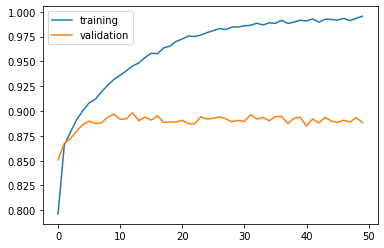

In [119]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [120]:
results1 = model.evaluate(X_test,y_test)

253/253 [==============================] - 16s 63ms/step - loss: 0.3380 - accuracy: 0.8758


In [132]:
results1[1]

0.875803530216217

In [135]:
model3 = Sequential()

In [136]:
model3.add(Conv2D(input_shape = (X.shape[1],X.shape[2],
                                X.shape[3]),filters =  10,
                                kernel_size = (3,3),strides=(1,1),padding="valid"))

In [137]:
#Activation Layer
model3.add(Activation("relu"))

In [138]:
#Pooling Layer
model3.add(MaxPooling2D(pool_size=(2,2)))

In [139]:
model3.add(Flatten())

In [143]:
model3.add(Dense(50))
model3.add(Activation('relu'))    
model3.add(Dropout(0.2))                        
model3.add(Dense(50))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))                        
model3.add(Dense(50))
model3.add(Activation('relu'))    
model3.add(Dropout(0.2))                        
model3.add(Dense(50))
model3.add(Activation('relu'))    
model3.add(Dropout(0.2))                         
model3.add(Dense(10))
model3.add(Activation('softmax'))  
  

In [144]:
adam = optimizers.Adam(lr=0.001)
model3.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])

In [145]:
history = model3.fit(X_train,y_train,batch_size=50,epochs=50,validation_split=0.3,verbose=1)

Epoch 1/50
588/588 [==============================] - 12s 20ms/step - loss: 1.0003 - accuracy: 0.6201 - val_loss: 0.5420 - val_accuracy: 0.7841
Epoch 2/50
588/588 [==============================] - 12s 20ms/step - loss: 0.5955 - accuracy: 0.7826 - val_loss: 0.4590 - val_accuracy: 0.8411
Epoch 3/50
588/588 [==============================] - 12s 20ms/step - loss: 0.4936 - accuracy: 0.8263 - val_loss: 0.3967 - val_accuracy: 0.8627
Epoch 4/50
588/588 [==============================] - 12s 20ms/step - loss: 0.4458 - accuracy: 0.8480 - val_loss: 0.3674 - val_accuracy: 0.8737
Epoch 5/50
588/588 [==============================] - 12s 20ms/step - loss: 0.4137 - accuracy: 0.8587 - val_loss: 0.3537 - val_accuracy: 0.8795
Epoch 6/50
588/588 [==============================] - 12s 20ms/step - loss: 0.3858 - accuracy: 0.8689 - val_loss: 0.3486 - val_accuracy: 0.8829
Epoch 7/50
588/588 [==============================] - 12s 20ms/step - loss: 0.3672 - accuracy: 0.8776 - val_loss: 0.3523 - val_accuracy:

In [147]:
results3 = model3.evaluate(X_test,y_test)

563/563 [==============================] - 3s 6ms/step - loss: 0.3663 - accuracy: 0.8973


In [148]:
results3[1]

0.8972777724266052

In [150]:
model4 = Sequential()

In [151]:
model4.add(Conv2D(input_shape = (X.shape[1],X.shape[2],
                                X.shape[3]),filters =  10,
                                kernel_size = (3,3),strides=(1,1),padding="valid"))

In [152]:
#Activation Layer
model4.add(Activation("relu"))

In [153]:
#Pooling Layer
model4.add(MaxPooling2D(pool_size=(2,2)))

In [154]:
model4.add(Flatten())

In [156]:
model4.add(Dense(50))
model4.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model4.add(Activation('relu'))    
model4.add(Dense(50))
model4.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model4.add(Activation('relu'))    
model4.add(Dense(50))
model4.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model4.add(Activation('relu'))    
model4.add(Dense(50))
model4.add(BatchNormalization())                    # Add Batchnorm layer before Activation
model4.add(Activation('relu'))    
model4.add(Dense(10))
model4.add(Activation('softmax'))   

In [157]:
adam = optimizers.Adam(lr=0.001)
model4.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])

In [158]:
history = model4.fit(X_train,y_train,batch_size=50,epochs=50,validation_split=0.3,verbose=1)

Epoch 1/50
588/588 [==============================] - 12s 21ms/step - loss: 0.5511 - accuracy: 0.8217 - val_loss: 0.3633 - val_accuracy: 0.8746
Epoch 2/50
588/588 [==============================] - 12s 20ms/step - loss: 0.3234 - accuracy: 0.8846 - val_loss: 0.3152 - val_accuracy: 0.8855
Epoch 3/50
588/588 [==============================] - 12s 20ms/step - loss: 0.2710 - accuracy: 0.9031 - val_loss: 0.3154 - val_accuracy: 0.8883
Epoch 4/50
588/588 [==============================] - 12s 20ms/step - loss: 0.2368 - accuracy: 0.9152 - val_loss: 0.3022 - val_accuracy: 0.8925
Epoch 5/50
588/588 [==============================] - 12s 20ms/step - loss: 0.2166 - accuracy: 0.9215 - val_loss: 0.2977 - val_accuracy: 0.8975
Epoch 6/50
588/588 [==============================] - 12s 20ms/step - loss: 0.1957 - accuracy: 0.9272 - val_loss: 0.3456 - val_accuracy: 0.8826
Epoch 7/50
588/588 [==============================] - 12s 20ms/step - loss: 0.1789 - accuracy: 0.9344 - val_loss: 0.3086 - val_accuracy:

In [159]:
results4 = model4.evaluate(X_test,y_test)

563/563 [==============================] - 3s 6ms/step - loss: 0.5566 - accuracy: 0.9024


In [160]:
results4[1]

0.902388870716095

In [161]:
!unzip "/content/drive/My Drive/test_ScVgIM0 (1).zip"

Streaming output truncated to the last 5000 lines.
 extracting: test/62169.png          
 extracting: test/66934.png          
 extracting: test/66646.png          
 extracting: test/63831.png          
 extracting: test/60971.png          
 extracting: test/68881.png          
 extracting: test/60259.png          
 extracting: test/68746.png          
 extracting: test/67545.png          
 extracting: test/60231.png          
 extracting: test/61498.png          
 extracting: test/63501.png          
 extracting: test/69452.png          
 extracting: test/61135.png          
 extracting: test/69976.png          
 extracting: test/60242.png          
 extracting: test/62900.png          
 extracting: test/69423.png          
 extracting: test/63283.png          
 extracting: test/62168.png          
 extracting: test/68546.png          
 extracting: test/61642.png          
 extracting: test/66667.png          
 extracting: test/69581.png          
 extracting: test/64172.png          

In [162]:
test = pd.read_csv("test.csv")

In [163]:
test.shape

(10000, 1)

In [164]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 10000/10000 [00:03<00:00, 2716.07it/s]


In [168]:

prediction = model4.predict_classes(test)

In [169]:
prediction

array([9, 2, 1, ..., 8, 1, 5])

In [170]:
# creating submission file
sample = pd.read_csv('sample_submission_I5njJSF.csv')

In [171]:
sample['label'] = prediction

In [172]:
sample.to_csv('sample_cnn.csv', header=True, index=False)